## Data classification
#### Create a model using k nearest neighbor and test it.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("Student_Performance.csv")

print(df.shape)
df.head()

(10000, 6)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df['Extracurricular Activities'] = LabelEncoder().fit_transform(df['Extracurricular Activities'])
bins = [0, 50, 75, 100]  
labels = ['Low', 'Medium', 'High'] 
df['Performance Category'] = pd.cut(df['Performance Index'], bins=bins, labels=labels)

df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Performance Category
0,7,99,1,9,1,91.0,High
1,4,82,0,4,2,65.0,Medium
2,8,51,1,7,2,45.0,Low
3,5,52,1,5,2,36.0,Low
4,7,75,0,8,5,66.0,Medium
5,3,78,0,9,6,61.0,Medium
6,7,73,1,5,6,63.0,Medium
7,8,45,1,4,6,42.0,Low
8,5,77,0,8,2,61.0,Medium
9,4,89,0,4,0,69.0,Medium


In [9]:
X = df.drop(['Performance Index', 'Performance Category'], axis=1)
y = df['Performance Category'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [14]:
y_pred = knn_model.predict(X_test)

resultados = classification_report(y_test, y_pred)

print("Reporte de Clasificación:")
print(resultados)

Reporte de Clasificación:
              precision    recall  f1-score   support

        High       0.90      0.94      0.92       511
         Low       0.96      0.98      0.97      1279
      Medium       0.95      0.91      0.93      1210

    accuracy                           0.95      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.95      0.95      0.95      3000



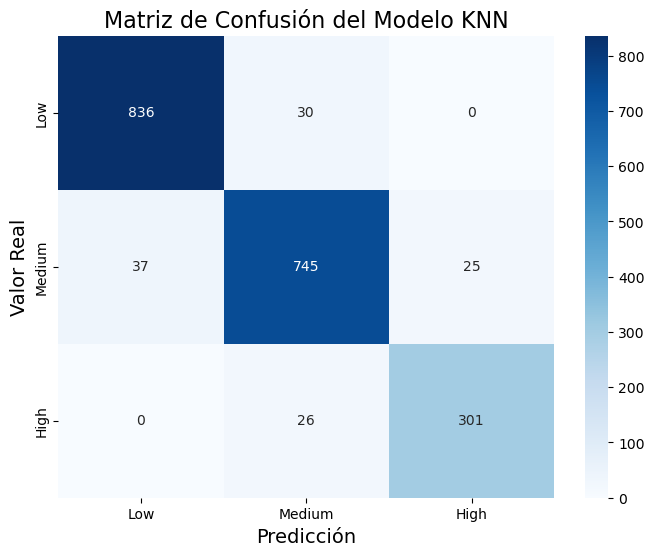

In [15]:
matriz_conf = confusion_matrix(y_test_class, y_pred_class, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_conf, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Matriz de Confusión del Modelo KNN', fontsize=16)
plt.xlabel('Predicción', fontsize=14)
plt.ylabel('Valor Real', fontsize=14)
plt.show()